In [1]:
# This needed to be installed for some reason
!pip install --upgrade pip

    100% |████████████████████████████████| 1.4MB 20.7MB/s ta 0:00:01
  Found existing installation: pip 10.0.1
    Uninstalling pip-10.0.1:
      Successfully uninstalled pip-10.0.1


In [2]:
# Importing Dask and Visualizations
import dask.dataframe as dd
import matplotlib.pyplot as plt


In [3]:
# Reading in the data from the terminal and the AWS SM instance
data = dd.read_csv("*.csv")

In [4]:
# Verifying that it worked
data.head()

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",1
1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,1
2,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com,1
3,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1
4,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,1


In [5]:
#Do the Rows and Colums Match JCs MD file....? Yep
print('Total Number of Rows: %d' % len(data.index))
print('Total Number of Columns: %d' % len(data.columns))


Total Number of Rows: 1956
Total Number of Columns: 5


In [9]:
#SPAM SPAM SPAM SPAM ... or Not SPAM SPAM SPAM SPAM
spammy = len(data[data.CLASS == 1])
not_spammy = len(data[data.CLASS == 0])

In [10]:
print('SPAM SPAM SPAM SPAM: %d' % spammy)
print('NOT NOT NOT NOT... SPAM: %d' % not_spammy)

SPAM SPAM SPAM SPAM: 1005
NOT NOT NOT NOT... SPAM: 951


In [12]:
#Microphone 'Check' (oh I am so freaking tired)
# All the "checks"
check = data[data.CONTENT.str.lower().str.contains('check')]
# Spam
spammy = check.CLASS.sum().compute()
# Not Spam
not_spammy = len(check.index) - spammy

print ('Total times the word "check" appeared as spam: %d' % spammy)
print ('Total times the word "check" was not spam: %d' % not_spammy)

Total times the word "check" appeared as spam: 461
Total times the word "check" was not spam: 19


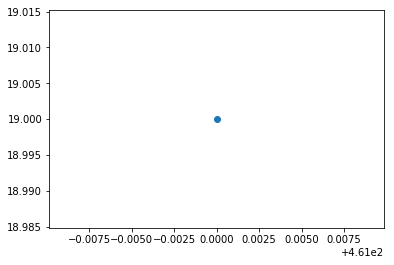

In [19]:
#Visualization for the 3-pointer
plt.scatter(spammy, not_spammy)
#Annnnnnnnd AIR BALL (What did I do wrong?)

# OK PART 2- Not really sure what to do but speak what I know on each... 

##### We have learned about AWS Sagemaker, Elastic Map Reduce, and Data Bricks as well as Dask.  Each of these platforms does different tasks for us as Data Scientists.  Some better than others.  Below is a breakdown of what each one does followed by my preference regarding each:


##### AWS SageMaker: Sage Maker allows us to build, train, and deploy machine learning models at scale. It was, by design, created to have a very small learning curve for Data Scientists and those engineers already using machine learning. It helps bring these models full cycle from creation to deployment. The fact that it is built using python and Jupyter Notebook just makes it that more familiar and easy to use.  I personally like Sage Maker but think that Auto ML from Google is far more advanced. Yesterday I spent two sessions at DevFest testing out Google Auto ML and with its seemless integration into TF 2.0 and Keras, as well as into Jupyter, I think it will give Sage Maker a run for its money.  Google cloud - Now Anthos, is designed with the Data Scientist in mind which is a very smart move for Google. 

##### AWS EMR: Elastic Map Reduce Is another tool for Big Data Processing. However, while it offers the infrastructure to run Apache Hadoopas it is quite cumbersome.  This is probably not a system that I would use if I had the choice. Again, from my hands on experience from yesterday I think that Google's DataProc is a better system than AWS EMR, and it was interesting because had this not been big data week at Lambda I wouldnt have even known what to look for in comparison. 

##### Databricks: Databricks is a cloud based service specifically for data scientists and engineers.  It allows you to build models and deploy them.  If it werent for their parent being Microsoft Id say this is an excellent service. Just kidding, It is quick and interactive and easy to use.  Its fast, collaborative and easy to create virtual cluseters.  This is probably a system that I will use in the future quite a bit when dealing with big Data. 

##### Dask: I know that a lot of people didnt like DASK but my experience was a positive one.  I feel like if you are comfortable with Pandas DFs and Numpy Arrays (Which I am)then the fact that you can use DASK to scale up your projects within those constructs is fantastic. I know it does not have the same capabilities as Spark but I do really think that it is an excellent service. It is still a viabile parallel computing Library. 


##### Numba: Numba is a just-in-time compiler for Python that works best on code that uses NumPy arrays and functions, and loops. The most common way to use Numba is through its collection of decorators that can be applied to your functions to instruct Numba to compile them. I really find the concept of Numba interseting because it compiles the python code down to C.  Again, I learned something new yesterday at the DevFest.  Tensor Flow 2.0 is 100% python based but it has 1 particular function that is `@tf.function` which does the same thing.  It allows you to take all your ML/DL code in Tensor Flow (Coded in Python and Jupyter Notebooks) and that one method call compiles the whole thing and runs it just in time format. 


##### MapReduce: What can I say about Map Reduce.  While it is the centerpoint of the HDFS and is a system in which parallelising and distrubting algrotithms is made easier, its also sort of OG.  Not necessarily the best player on the block anymore but certainly has the history to have 'street cred'. 

##### Spark:  Apache Spark is open source,its general-purpose and its a distributed computing engine used for processing and analyzing alarge amount of data. It is the new kid on the block so to speak and  it works with Hadoop  system to distribute data across the cluster parallelizing data. I particularly like the fact, contrary to DASK, that the data is stored in Memory which would make it faster to run for ML models.  It is becoming an industry standard across all cloud systems as well.

##### Python: Tis a very silly language. Its mother was a hamster and its father smelled of elderberries... Ok enough silliness. But alas it is what Gaven Van Rossum named the language for Month Python. And he did it for good reason. He was looking to build a less serious language.  Something that could be appreciated by its high level or productivity and its simple, nearly declarative, syntax, readability, and commands. It has made for a world class code that is very functional.  Thats the sales pitch.  Again, referencing my program I was at yesterday Josh Gordon talked about how even though Python is Fantasic, wonderful, and everones favorite language, there are newer languages, such as Swift, that are coming into the ML/DL framewokr that can get jobs done faster.  Swift for example is catching fire so quickly Tensor Flow is creating an entire library based on swift in addition to python. Intersting stuff.

##### SQL: What can I say about IBMs SEQUEL. It arrived it the 70's.  Its relativley easy.  They changed the name to SQL because SEQUEL was already trademarked. oops.  It is a language for RDBM Systems.  There are a LOT of dialects in SQL.  I dont really understand why but it is strange that such a unified language has so many dialects.  I saw one of those cartoons Aaron always references.  It talks about how there are 114 dialects and the character is going to unify them all-- ONE SQL to rule them all.... punchline.... Now there are 115 dialects. 

##### Scala: Scala is the language of scalability.  It is realitivley easy to learn and use.  It is a JVM functional programming language. It is ultimately easier to use and increases productivity. Scala is faster than python because it is interpereted and not compiled .

##### Java: I honestly dont have much experience with Java and dont know much about Java except that it, like python is an OOP, and is supposed to have the feel of C languages.  I also know that with the advent of JavaScript Java became a bit obsolete except for running JVM machines which other languages like Scala can run on in terms of environment. 
